In [1]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
import fiona
import shapely
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob
from pathlib import Path
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_n_preprocess(im_path=None):
    '''
        Input: image and mask path
        Return: flatten feature and label to feed into classifier
    '''
    with fiona.open(im_path.replace("crop.tif","new_shape.shp"), "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(im_path) as src:
        data = src.read()
        out_meta = src.meta
        mask = rasterio.features.geometry_mask(shapes, (src.height, src.width), src.transform, invert=True, all_touched=True, ).astype('uint8')
        # out_image, transformed = rasterio.mask.mask(src, shapes, crop=True, filled=True)
    return data, mask, data.shape[1:3], out_meta#, out_image


def read_n_preprocess2(im_path=None):
    '''
        Input: image and mask path
        Return: flatten feature and label to feed into classifier
    '''
    with fiona.open(im_path.replace("mau2.tif","mau2.shp"), "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(im_path) as src:
        data = src.read()
        out_meta = src.meta
        mask = rasterio.features.geometry_mask(shapes, (src.height, src.width), src.transform, invert=True, all_touched=True).astype('uint8')
        # out_image, transformed = rasterio.mask.mask(src, shapes, crop=True, filled=True)
    return data, mask, data.shape[1:3], out_meta

In [3]:
# im_path = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_final/noise_data/update_noise/crop.tif"
# with fiona.open(im_path.replace("crop.tif","new_shape.shp"), "r") as shapefile:
#         shapes = [feature["geometry"] for feature in shapefile]

In [4]:
from sklearn.model_selection import train_test_split

# img_path = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_final/final_data/clip_1/clip_1.tif"
img_path2 = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_final/final_data/clip_2/clip_2.tif"
img_path3 = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_final/final_data/clip_3/clip_3.tif"

img_path = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_final/cloud_data/process/mau2/mau2.tif"

In [5]:
# data, mask, shape, meta, out_image = read_n_preprocess(img_path)
data, mask, shape, meta = read_n_preprocess2(img_path)

/home/skymap/anaconda3/envs/msi/lib/python3.9/site-packages/rasterio/features.py:322: ShapeSkipWarning: Invalid or empty shape None at index 53 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/skymap/anaconda3/envs/msi/lib/python3.9/site-packages/rasterio/features.py:322: ShapeSkipWarning: Invalid or empty shape None at index 57 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
/home/skymap/anaconda3/envs/msi/lib/python3.9/site-packages/rasterio/features.py:322: ShapeSkipWarning: Invalid or empty shape None at index 262 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)


In [6]:
outmask_path = img_path.replace(".tif", "_label.tif")
meta.update({
    "nodata": None,
    "count": 1,
    # "width": out_image.shape[1],
    # "height": out_image.shape[2]
})
with rasterio.open(outmask_path, "w", compress='lzw', **meta) as dest: # count =??
    dest.write((mask+1)[np.newaxis,...].astype(np.uint8))

In [7]:
meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 6167,
 'height': 3222,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(9.36171626386792e-05, 0.0, 88.14457683518172,
        0.0, -9.360436548337087e-05, 22.592145369003735)}

In [8]:
import numpy as np

list_rand = list(np.random.normal(loc = 1000,scale=100, size=(1000)))

In [9]:
list_rand.pop(0)

1019.6804421358307

In [8]:
img = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_img/img_float/mau2.tif"
with rasterio.open(img) as src:
    data = src.read()
    meta = src.meta
meta.update({
    'dtype': np.uint16
})

In [6]:
meta

{'driver': 'GTiff',
 'dtype': numpy.uint16,
 'nodata': None,
 'width': 2760,
 'height': 1884,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(9.361716263868153e-05, 0.0, 88.15141088805434,
        0.0, -9.360436548337053e-05, 22.488899753875575)}

In [9]:
out = r"/home/geoai/eodata/cloud_detect_tensorflow/raw_img/img_float/mau2_uint.tif"
with rasterio.open(out, "w+", **meta) as dst:
    dst.write(data*15000)

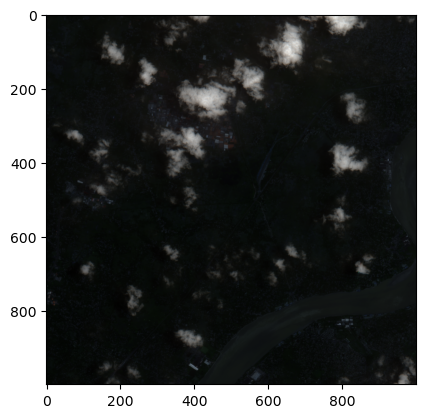

In [22]:
plt.imshow(data*)